In [70]:
import pandas as pd

In [71]:
df_data = pd.read_csv("train.csv")
df_data.head()

,1/1/2017,1,1.1,19
0,1/2/2017,1,1,15
1,1/3/2017,1,1,10
2,1/4/2017,1,1,16
3,1/5/2017,1,1,14
4,1/6/2017,1,1,24


In [78]:
import pandas as pd

# Read the CSV file without header and provide column names explicitly
df_data = pd.read_csv("train.csv", header=None, names=['date', 'store', 'item', 'sales'])

# Display the DataFrame
print(df_data.head())


       date  store  item  sales
0  1/1/2017      1     1     19
1  1/2/2017      1     1     15
2  1/3/2017      1     1     10
3  1/4/2017      1     1     16
4  1/5/2017      1     1     14


In [79]:
df_data.rename(columns={'1/1/2017': 'date'}, inplace=True)

In [ ]:
import data_preprocessor
from data_preprocessor import DataPreProcessor
instance = DataPreProcessor()
instance.cleanData(df_sales=df_data)

In [81]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_supervised is your DataFrame containing the time series data
# Assuming 'sales' is the original time series variable you want to predict

# Create lagged variables
for i in range(1, 13):
    df_data[f'lag_{i}'] = df_data['sales'].shift(i)

# Drop rows with NaN values introduced by the shifting
df_data.dropna(inplace=True)

# Split data into training and testing sets
train_size = int(0.8 * len(df_data))
train, test = df_data[:train_size], df_data[train_size:]

# Fit ARIMA model
model = ARIMA(train['sales'], order=(1, 0, 0)) 
arima_model = model.fit()

# Forecast
forecast = arima_model.forecast(steps=len(test))

# Evaluate the forecast
# Here you can compare the forecasted values (forecast) with the actual values (test['sales'])

# Print model summary
print(arima_model.summary())


c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index 

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:               729221
Model:                 ARIMA(1, 0, 0)   Log Likelihood            -2964793.718
Date:                Fri, 26 Apr 2024   AIC                        5929593.435
Time:                        13:01:30   BIC                        5929627.934
Sample:                             0   HQIC                       5929603.051
                             - 729221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.1886      0.162    333.561      0.000      53.870      54.507
ar.L1          0.8763      0.001   1709.322      0.000       0.875       0.877
sigma2       199.0425      0.271    734.144      0.0

In [86]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

# Check if 'date' column exists in the DataFrame
if 'date' in df_data.columns:
    # Drop 'sales' and 'date' columns
    df_model = df_data.drop(['sales', 'date'], axis=1)
    
    # Split data into train and test sets
    train_set, test_set = df_model.iloc[:-6], df_model.iloc[-6:]
    
    # Apply MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(train_set)
    train_set_scaled = scaler.transform(train_set)
    test_set_scaled = scaler.transform(test_set)
    
    target_column_index = 0  

    # Extract the target variable
    endog = train_set_scaled[:, 0]

    # Fit SARIMAX model
    model = ARIMA(endog, order=(1, 0, 0))
    arima_model = model.fit()

    # Forecast
    # Reshape the forecast array to match the shape of the original input data
    forecast = forecast.reshape(-1, len(df_model.columns))

    # Inverse transform the forecasted values to get them back to the original scale
    forecast_inverse = scaler.inverse_transform(forecast)

    # Print the forecasted values
    print("Forecasted values:")
    print(forecast_inverse)

    
else:
    print("The 'date' column does not exist in the DataFrame.")


ValueError: cannot reshape array of size 6 into shape (14)

In [34]:
df_data['date'] = pd.to_datetime(df_data['date'],  format='%Y-%m-%d')
df_data.head()

,date,store,item,sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
12,2013-01-01,1,1,10,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0,14.0,11.0,13.0
13,2013-01-01,1,1,12,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0,14.0,11.0
14,2013-01-01,1,1,5,12.0,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0,14.0
15,2013-01-01,1,1,7,5.0,12.0,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0
16,2013-01-01,1,1,16,7.0,5.0,12.0,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0


In [35]:
df_data.set_index("date", inplace= True)

In [36]:
df_data.head()

,store,item,sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
date,,,,,,,,,,,,,,,
2013-01-01,1,1,10,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0,14.0,11.0,13.0
2013-01-01,1,1,12,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0,14.0,11.0
2013-01-01,1,1,5,12.0,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0,14.0
2013-01-01,1,1,7,5.0,12.0,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0
2013-01-01,1,1,16,7.0,5.0,12.0,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0


In [37]:
df_data.index = pd.to_datetime(df_data.index)


In [38]:
df_data.index.freq = pd.infer_freq(df_data.index) #month start

In [39]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 912988 entries, 2013-01-01 to 2017-12-01
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   store   912988 non-null  int64  
 1   item    912988 non-null  int64  
 2   sales   912988 non-null  int64  
 3   lag_1   912988 non-null  float64
 4   lag_2   912988 non-null  float64
 5   lag_3   912988 non-null  float64
 6   lag_4   912988 non-null  float64
 7   lag_5   912988 non-null  float64
 8   lag_6   912988 non-null  float64
 9   lag_7   912988 non-null  float64
 10  lag_8   912988 non-null  float64
 11  lag_9   912988 non-null  float64
 12  lag_10  912988 non-null  float64
 13  lag_11  912988 non-null  float64
 14  lag_12  912988 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 111.4 MB


In [40]:
import numpy as np

In [41]:
df_data["sales"] = df_data["sales"].astype(np.int64)

In [42]:
df_data.head()

,store,item,sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
date,,,,,,,,,,,,,,,
2013-01-01,1,1,10,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0,14.0,11.0,13.0
2013-01-01,1,1,12,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0,14.0,11.0
2013-01-01,1,1,5,12.0,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0,14.0
2013-01-01,1,1,7,5.0,12.0,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0,13.0
2013-01-01,1,1,16,7.0,5.0,12.0,10.0,7.0,9.0,9.0,12.0,9.0,10.0,12.0,10.0


In [43]:
import matplotlib.pyplot as plt

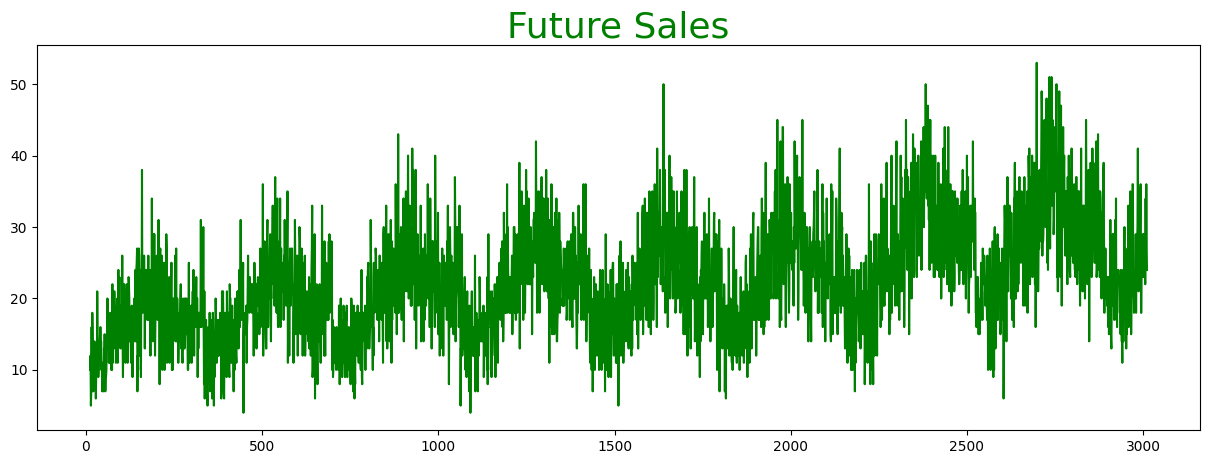

In [52]:
df_data["sales"][:3000].plot(figsize=(15, 5), color="green")
plt.title("Future Sales", size=26, color="green")
plt.show()

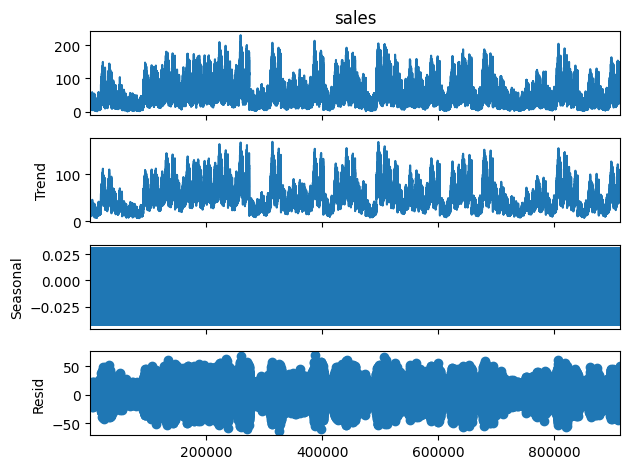

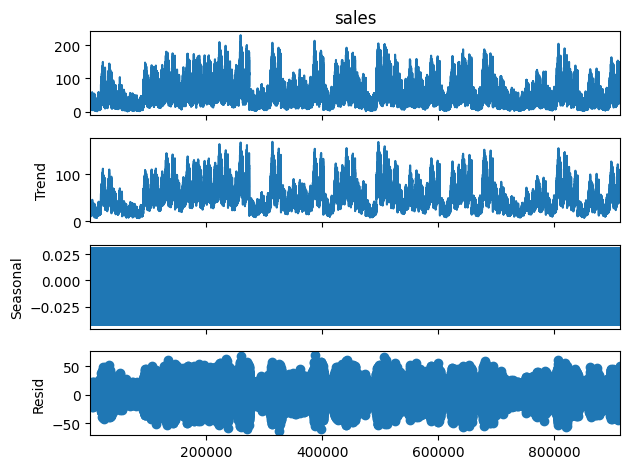

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_data["sales"], model="add", period=12)
result.plot()

In [54]:
from pmdarima import auto_arima

In [55]:
auto_arima(df_data["sales"], seasonal=True, m=12).summary()

KeyboardInterrupt: 